In [1]:
import pandas as pd

# load the training dataset
flight_data = pd.read_csv(r"C:\Users\colka\OneDrive\Documents\WebStore\SideQuests\datasources\challenges\data\flights.csv")
flight_data.head()


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [2]:
flight_data.isnull().sum()
flight_data[flight_data.isnull().any(axis=1)][['DepDelay', 'DepDel15']]
flight_data[flight_data.isnull().any(axis=1)].DepDelay.describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

In [3]:
flight_data.DepDel15 = flight_data.DepDel15.fillna(0).astype(int)
flight_data.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

DepDelay
Minimum Value: -63
 Maximum Value: 1425
 Mean Value: 10.350448628373906
 Median Value: -1.0
 Mode Value: -3

ArrDelay
Minimum Value: -75
 Maximum Value: 1440
 Mean Value: 6.496649996322718
 Median Value: -3.0
 Mode Value: 0



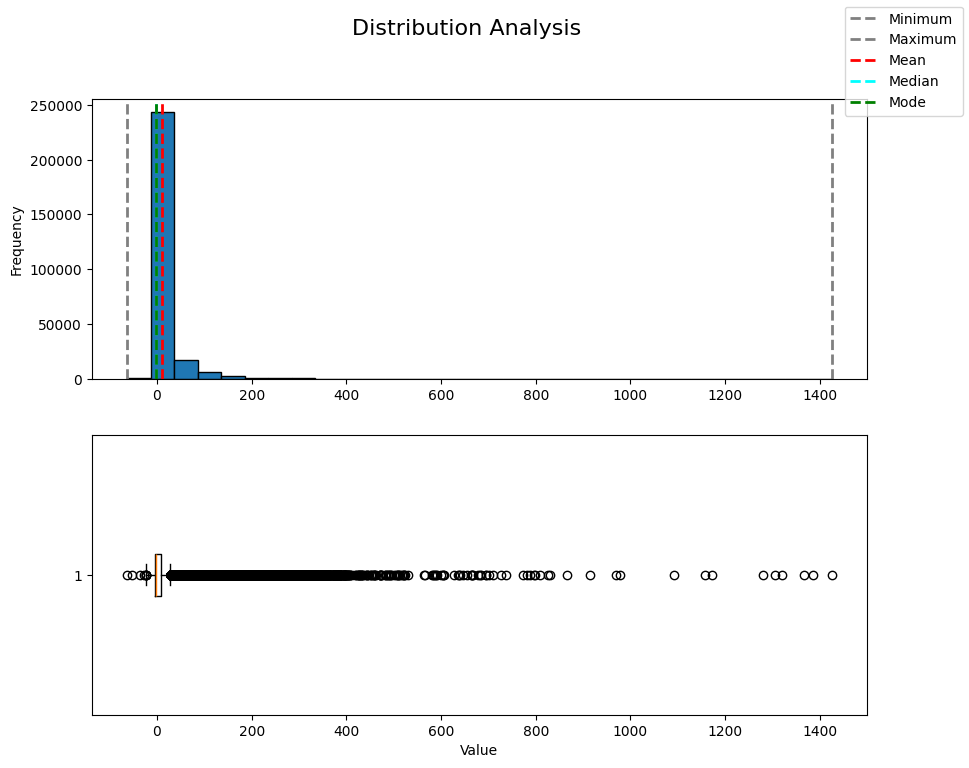

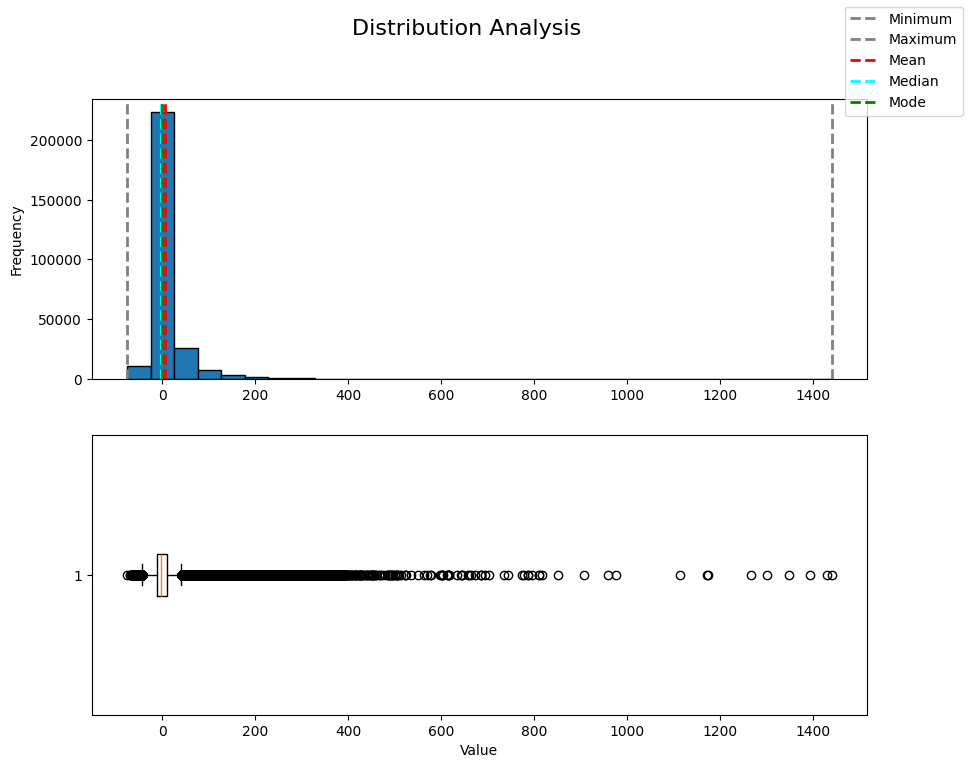

In [4]:
def explore_dist(data):
    from matplotlib import pyplot as plt

    min_val = data.min()
    max_val = data.max()
    mean_val = data.mean()
    median_val = data.median()
    mode_val = data.mode()[0]
    print(f"{data.name}\nMinimum Value: {min_val}\n Maximum Value: {max_val}\n Mean Value: {mean_val}\n Median Value: {median_val}\n Mode Value: {mode_val}\n")

    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    ax[0].hist(data,bins =30, edgecolor ='black')
    ax[0].set_ylabel('Frequency')

    ax[0].axvline(min_val, color='gray', linestyle='dashed',linewidth= 2, label='Minimum')
    ax[0].axvline(max_val, color='gray', linestyle='dashed',linewidth= 2, label='Maximum')
    ax[0].axvline(mean_val, color='red', linestyle='dashed',linewidth= 2, label='Mean')
    ax[0].axvline(median_val, color='cyan', linestyle='dashed',linewidth= 2, label='Median')
    ax[0].axvline(mode_val, color='green', linestyle='dashed',linewidth= 2, label='Mode')

    ax[1].boxplot(data, vert=False)
    ax[1].set_xlabel('Value')

    fig.legend()
    fig.suptitle('Distribution Analysis', fontsize=16)
    fig

explore_dist(flight_data.DepDelay)
explore_dist(flight_data.ArrDelay)

DepDelay
Minimum Value: -11
 Maximum Value: 36
 Mean Value: 1.2884174751492747
 Median Value: -1.0
 Mode Value: -3

ArrDelay
Minimum Value: -32
 Maximum Value: 37
 Mean Value: -3.1036660675803445
 Median Value: -5.0
 Mode Value: 0



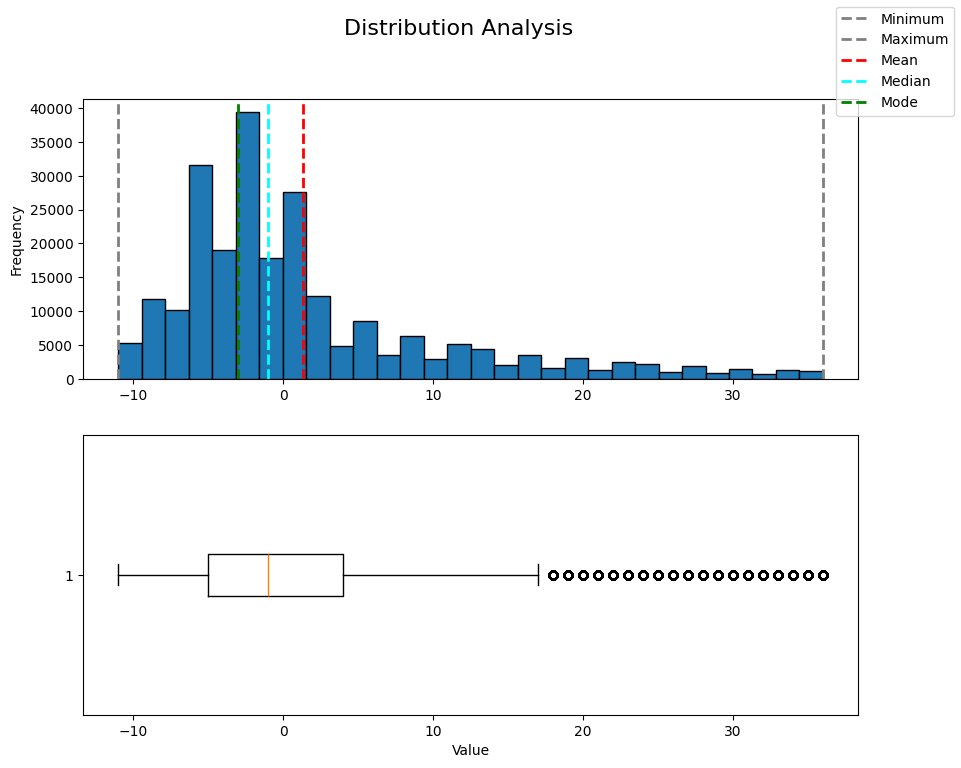

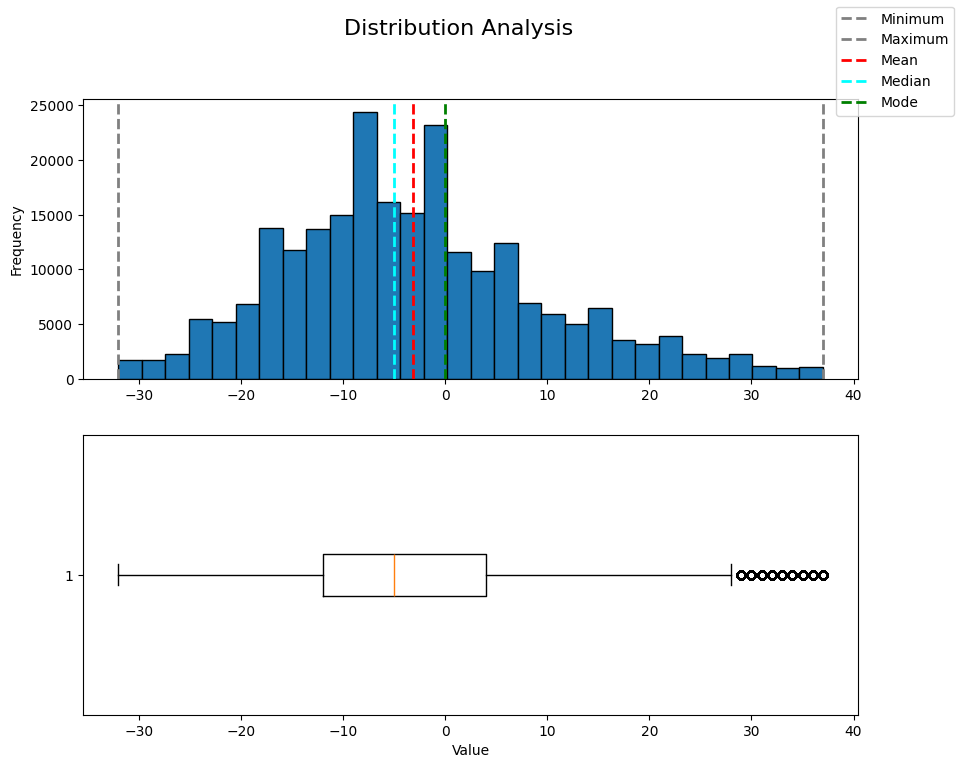

In [5]:
arrDelay_90percentile=flight_data.ArrDelay.quantile(.9)
arrDelay_10percentile=flight_data.ArrDelay.quantile(.01)

depDelay_90percentile=flight_data.DepDelay.quantile(.9)
depDelay_10percentile=flight_data.DepDelay.quantile(.01)

flights=flight_data[(flight_data.ArrDelay<arrDelay_90percentile) & (flight_data.ArrDelay >arrDelay_10percentile) & (flight_data.DepDelay < depDelay_90percentile) & (flight_data.DepDelay > depDelay_10percentile)]
explore_dist(flights.DepDelay)
explore_dist(flights.ArrDelay)

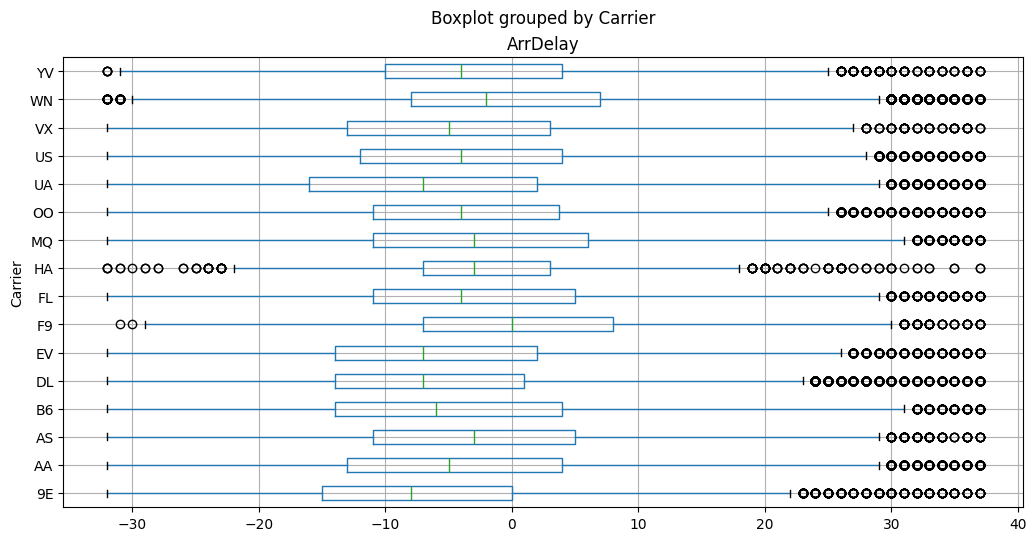

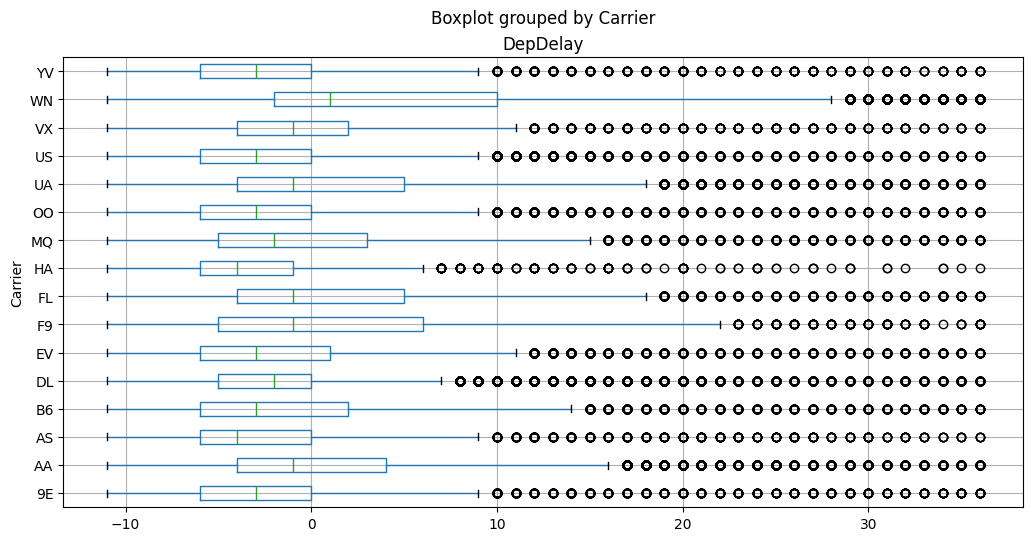

In [6]:
for col in ['ArrDelay', 'DepDelay']:
    flights.boxplot(column=col, by="Carrier", vert=False, figsize=(12, 6))


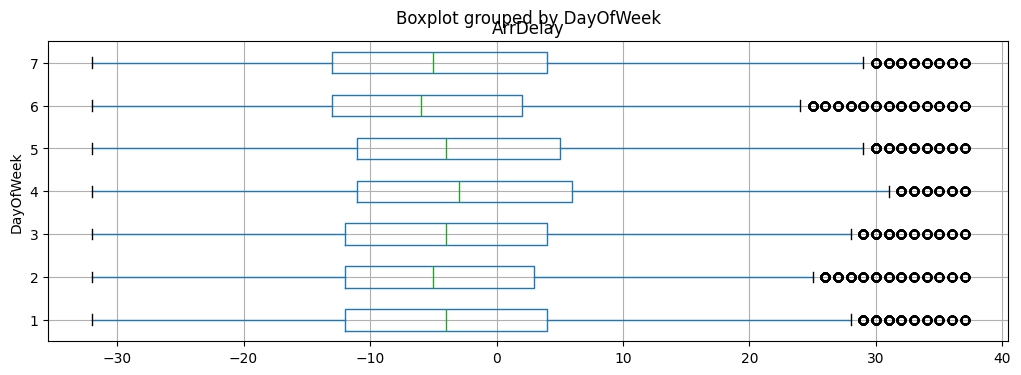

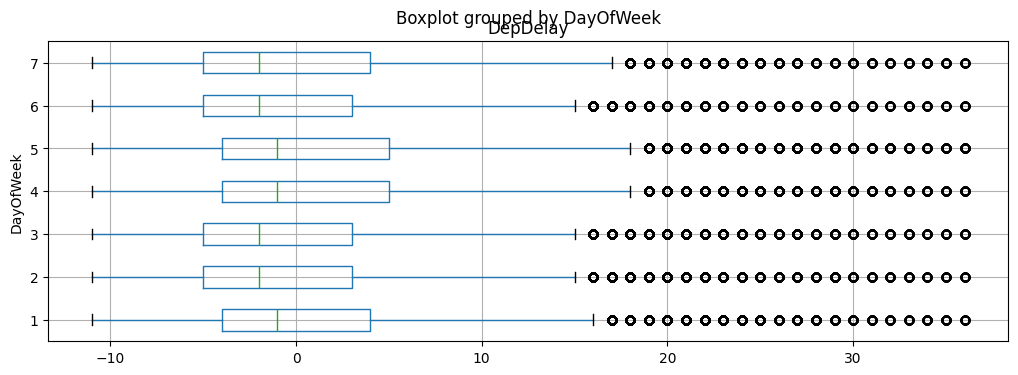

In [7]:
for col in ['ArrDelay', 'DepDelay']:
    flights.boxplot(column=col, by="DayOfWeek", vert=False, figsize=(12, 4))


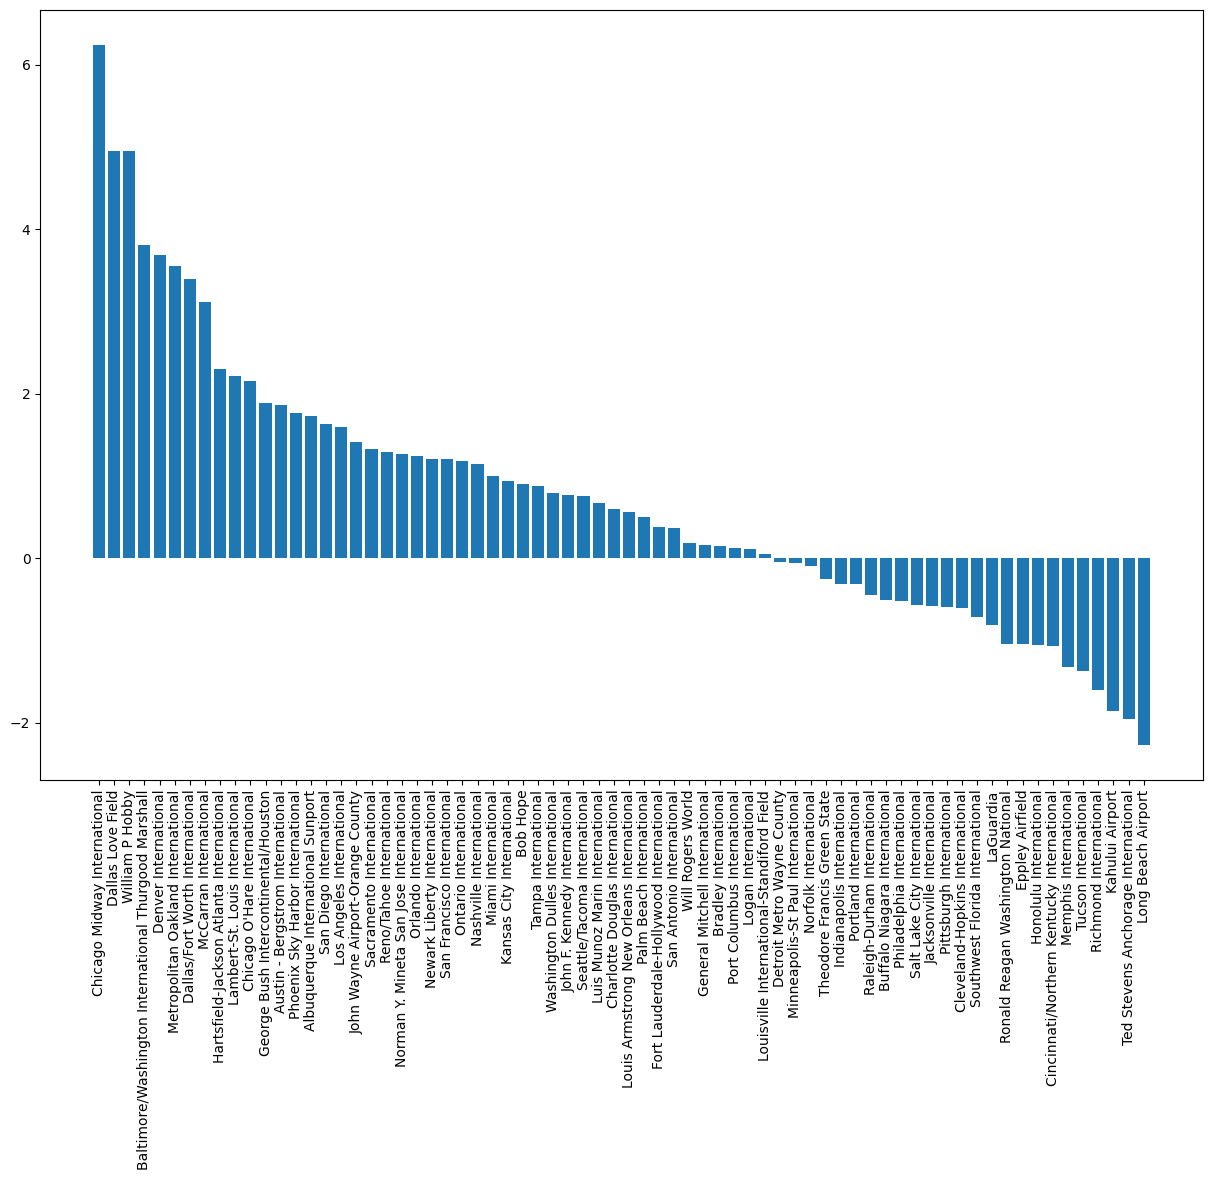

In [8]:
from matplotlib import pyplot as plt
departures = flights.groupby('OriginAirportName').DepDelay.mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
plt.bar(departures.index, departures)
plt.xticks(rotation=90)
plt.show()

<Axes: title={'center': 'ArrDelay'}, ylabel='DepDel15'>

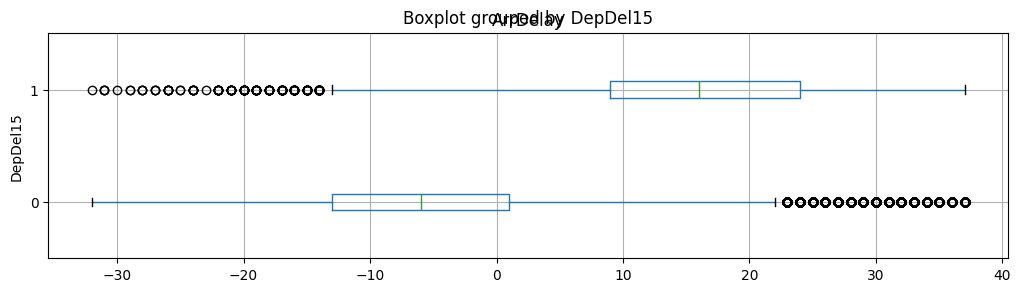

In [9]:
flights.boxplot(column = 'ArrDelay', by = 'DepDel15',vert = False, figsize =(12,3))

In [10]:
# Find worst route by count of delayed arrivals
worstRoute = (flights[flights['ArrDel15'] == 1].groupby(['DestAirportName', 'OriginAirportName']).size().sort_values(ascending=False).index[0]
)

Delay = flights[(flights.DestAirportName == worstRoute[0]) &(flights.OriginAirportName == worstRoute[1])]['ArrDel15'].mean() * 100 

worstRoutes = (flights[flights['ArrDel15'] == 1].groupby(['DestAirportName', 'OriginAirportName']).size().sort_values(ascending=False).head(5)
)

print(worstRoutes)
print(f"The worst route is from {worstRoute[1]} to {worstRoute[0]} with an average delay rate of {Delay:.2f}%")

DestAirportName                           OriginAirportName          
Los Angeles International                 San Francisco International    146
San Francisco International               Los Angeles International      123
Los Angeles International                 McCarran International          90
Hartsfield-Jackson Atlanta International  LaGuardia                       88
McCarran International                    Los Angeles International       80
dtype: int64
The worst route is from San Francisco International to Los Angeles International with an average delay rate of 17.26%


In [11]:
worstRoute = flights.groupby(['DestAirportName','OriginAirportName']).ArrDelay.mean().sort_values(ascending=False).index[0]
Delay = flights[(flights.DestAirportName == worstRoute[0])& (flights.OriginAirportName == worstRoute[1])].ArrDelay.mean().astype(int)
worstRoutes = flights.groupby(['DestAirportName','OriginAirportName']).ArrDelay.mean().sort_values(ascending=False).head(5)

print(worstRoutes)
print(f"The worst route is from {worstRoute[1]} to {worstRoute[0]} with an average delay of {Delay} minutes.")



DestAirportName                    OriginAirportName                        
Ronald Reagan Washington National  Louis Armstrong New Orleans International    25.333333
Palm Beach International           Cleveland-Hopkins International              18.000000
Raleigh-Durham International       Denver International                         14.153846
General Mitchell International     Charlotte Douglas International              13.500000
Philadelphia International         Cleveland-Hopkins International              12.800000
Name: ArrDelay, dtype: float64
The worst route is from Louis Armstrong New Orleans International to Ronald Reagan Washington National with an average delay of 25 minutes.
